# Boston Housing Study
### Use data from the Boston Housing Study case as described in "Marketing Data Science: Modeling Techniques for Predictive Analytics with R and Python" (Miller 2015). We use data from the Boston Housing Study to evaluate regression modeling methods within a cross-validation design.

### The Boston Housing Study is a market response study of sorts, with the market being 506 census tracts in the Boston metropolitan area. The objective of the study was to examine the effect of air pollution on housing prices, controlling for the effects of other explanatory variables. The response variable is the median price of homes in the census track. Table 1 shows variables included in the case. Short variable names correspond to those used in previously published studies. 

Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

### Scikit Learn documentation for this assignment:
http://scikit-learn.org/stable/modules/model_evaluation.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

### Textbook reference materials:
Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models has sections covering linear regression, polynomial regression, and regularized linear models. Sample code from the book is available on GitHub at https://github.com/ageron/handson-ml.

## Environment Setup & Data Preparation

In [18]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from math import log10

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input, we will fit the intercept term in the models
# expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [3]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# read data directly from GitHub
url = 'https://raw.githubusercontent.com/mtpa/mds/master/MDS_Appendix_C/MDS_Appendix_C_4/boston.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [4]:
df.head()

crim    zn  indus  chas    nox  rooms   age     dis  rad  \
neighborhood                                                                
Nahant        0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
Swampscott    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
Swanpscott    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
Marblehead    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
Marblehead    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

              tax  ptratio  lstat    mv  
neighborhood                             
Nahant        296     15.3   4.98  24.0  
Swampscott    242     17.8   9.14  21.6  
Swanpscott    242     17.8   4.03  34.7  
Marblehead    222     18.7   2.94  33.4  
Marblehead    222     18.7   5.33  36.2

In [5]:
boston_input.head()

neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2

In [6]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [7]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None

Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      

In [8]:
# set up preliminary data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [9]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [25]:
# create log transformation of dependent variable
mv_log = np.log10(prelim_model_data[:,0])
mv_log = mv_log.reshape(-1,1)

In [31]:
# add log column to array
prelim_model_data_log = np.append(prelim_model_data, mv_log, axis=1)

In [10]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [11]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [12]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [13]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [36]:
model_data_log = scaler.fit_transform(prelim_model_data_log[:,1:])

In [37]:
print('\nDimensions for model_data:', model_data_log.shape)


Dimensions for model_data: (506, 13)


## Exploratory Data Analysis

In [39]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

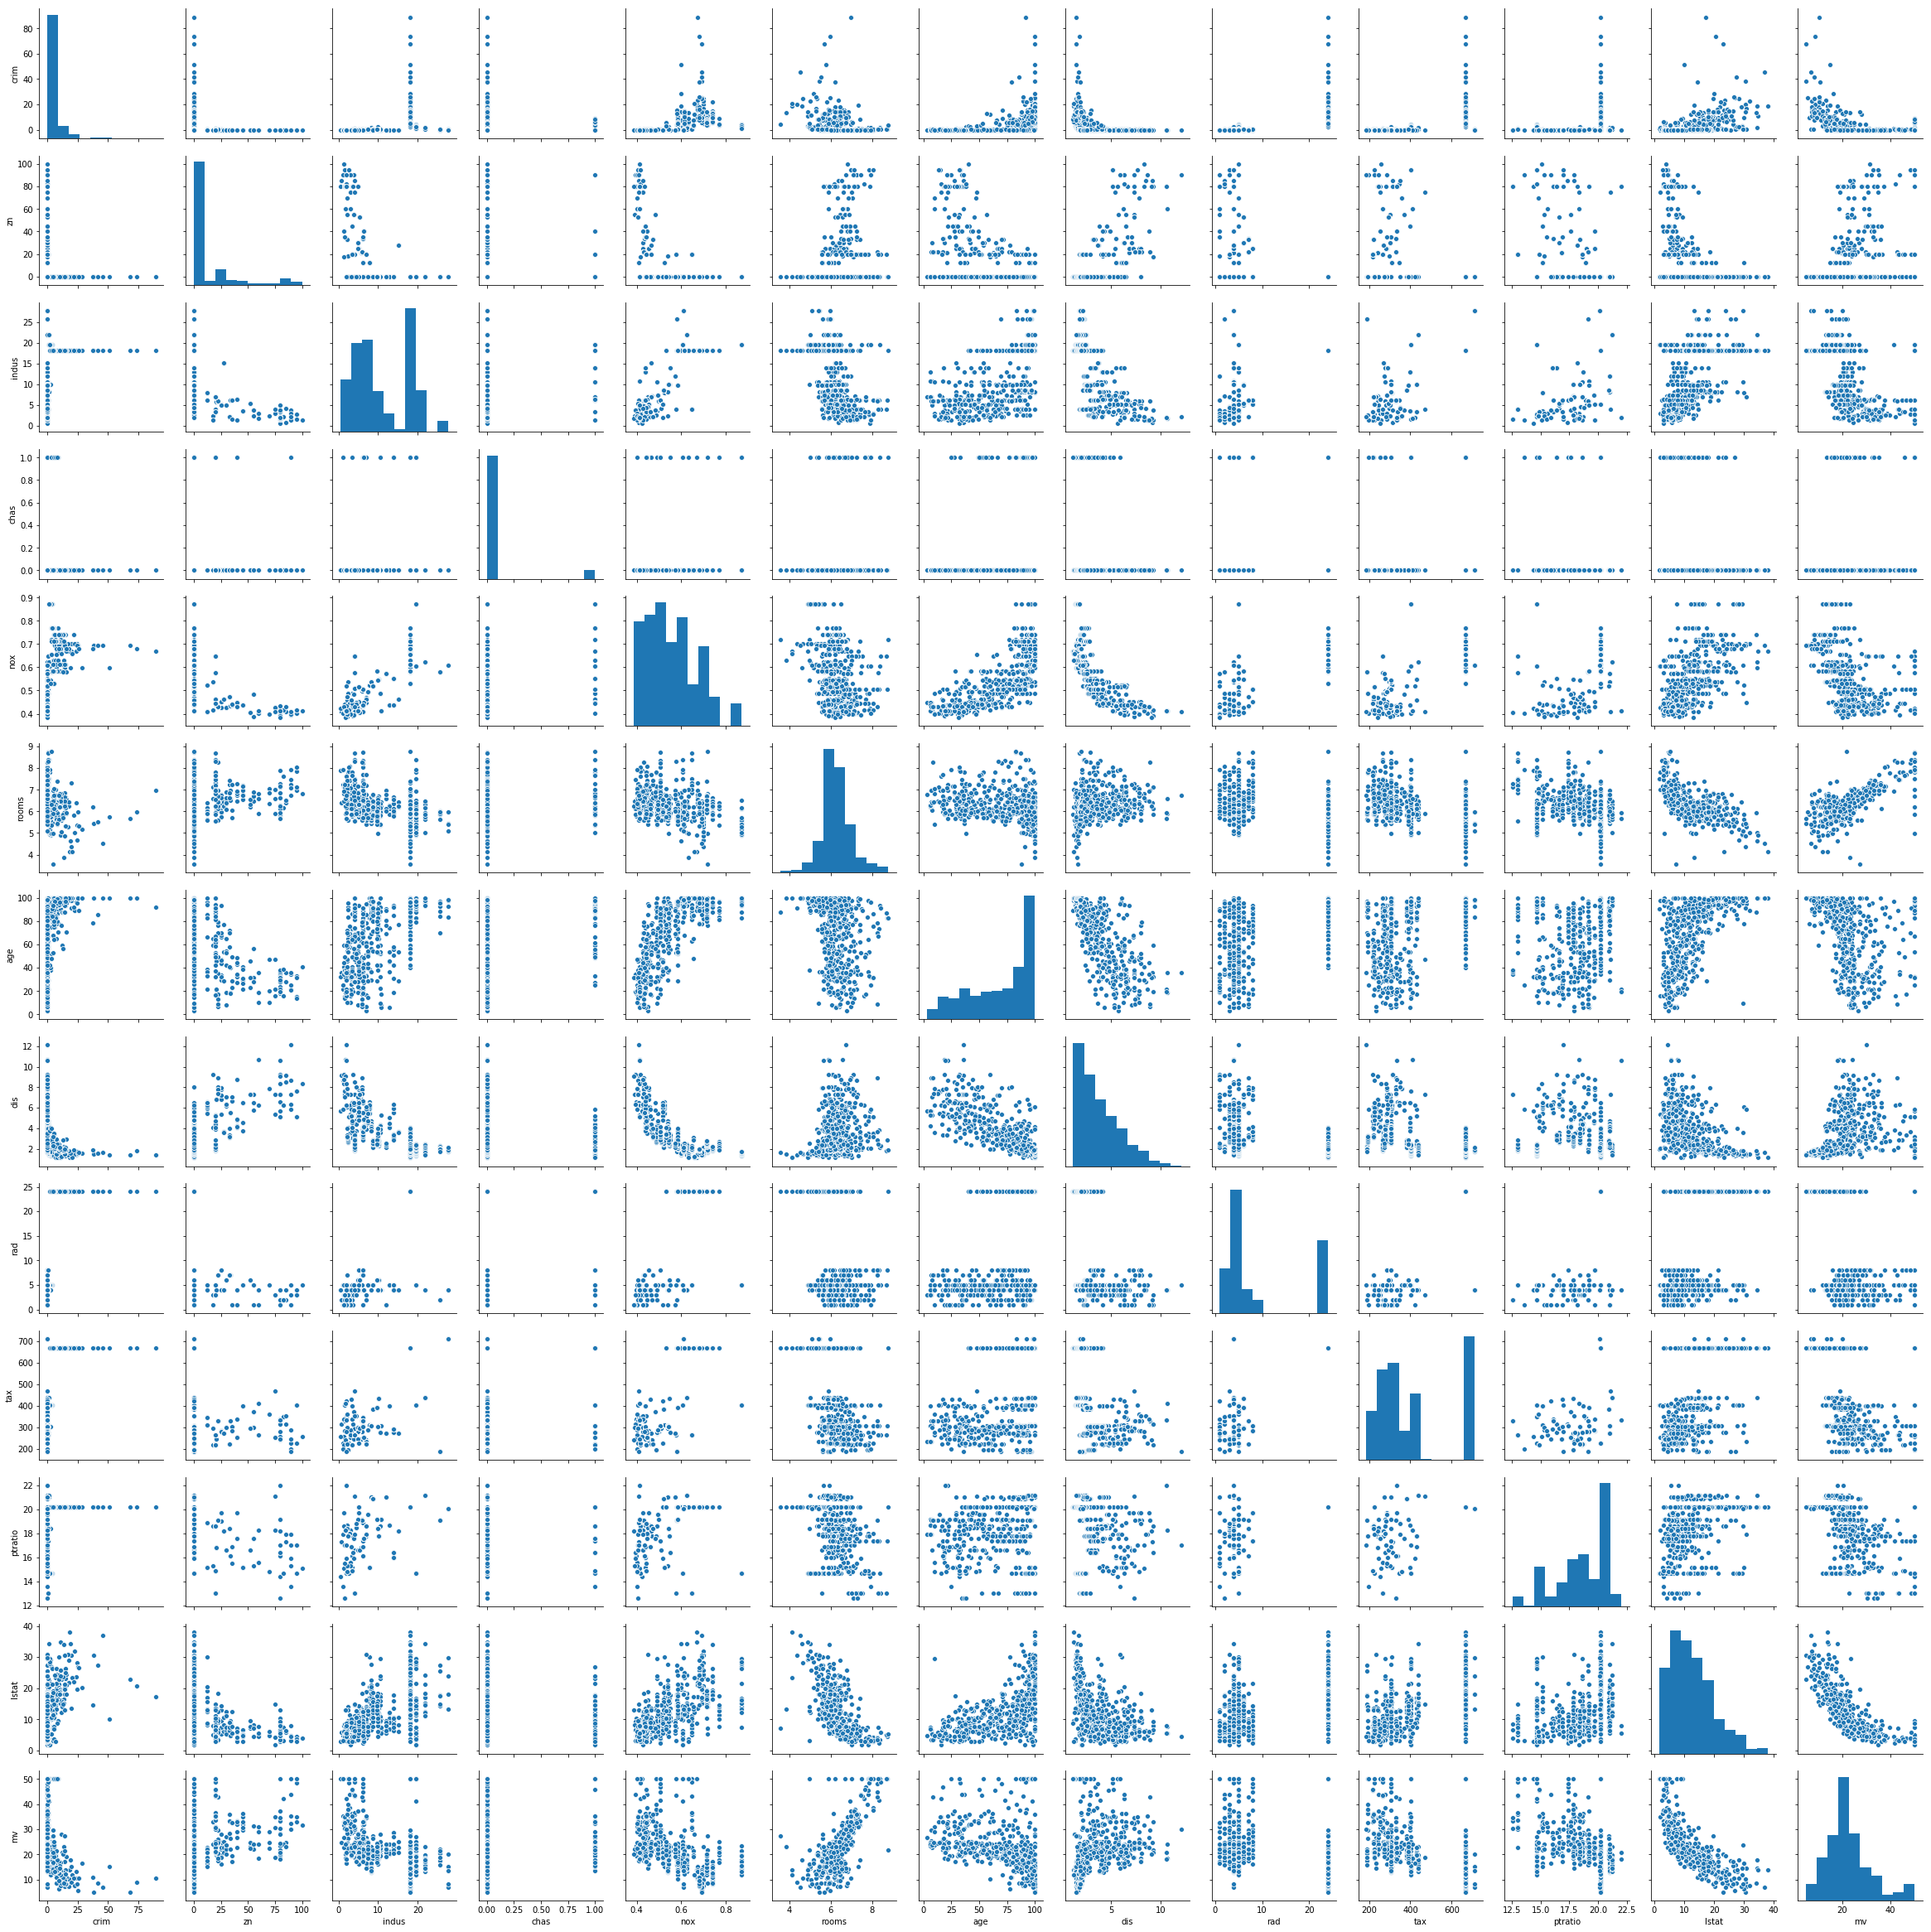

In [31]:
sns.pairplot(boston, kind="scatter")
plt.show()

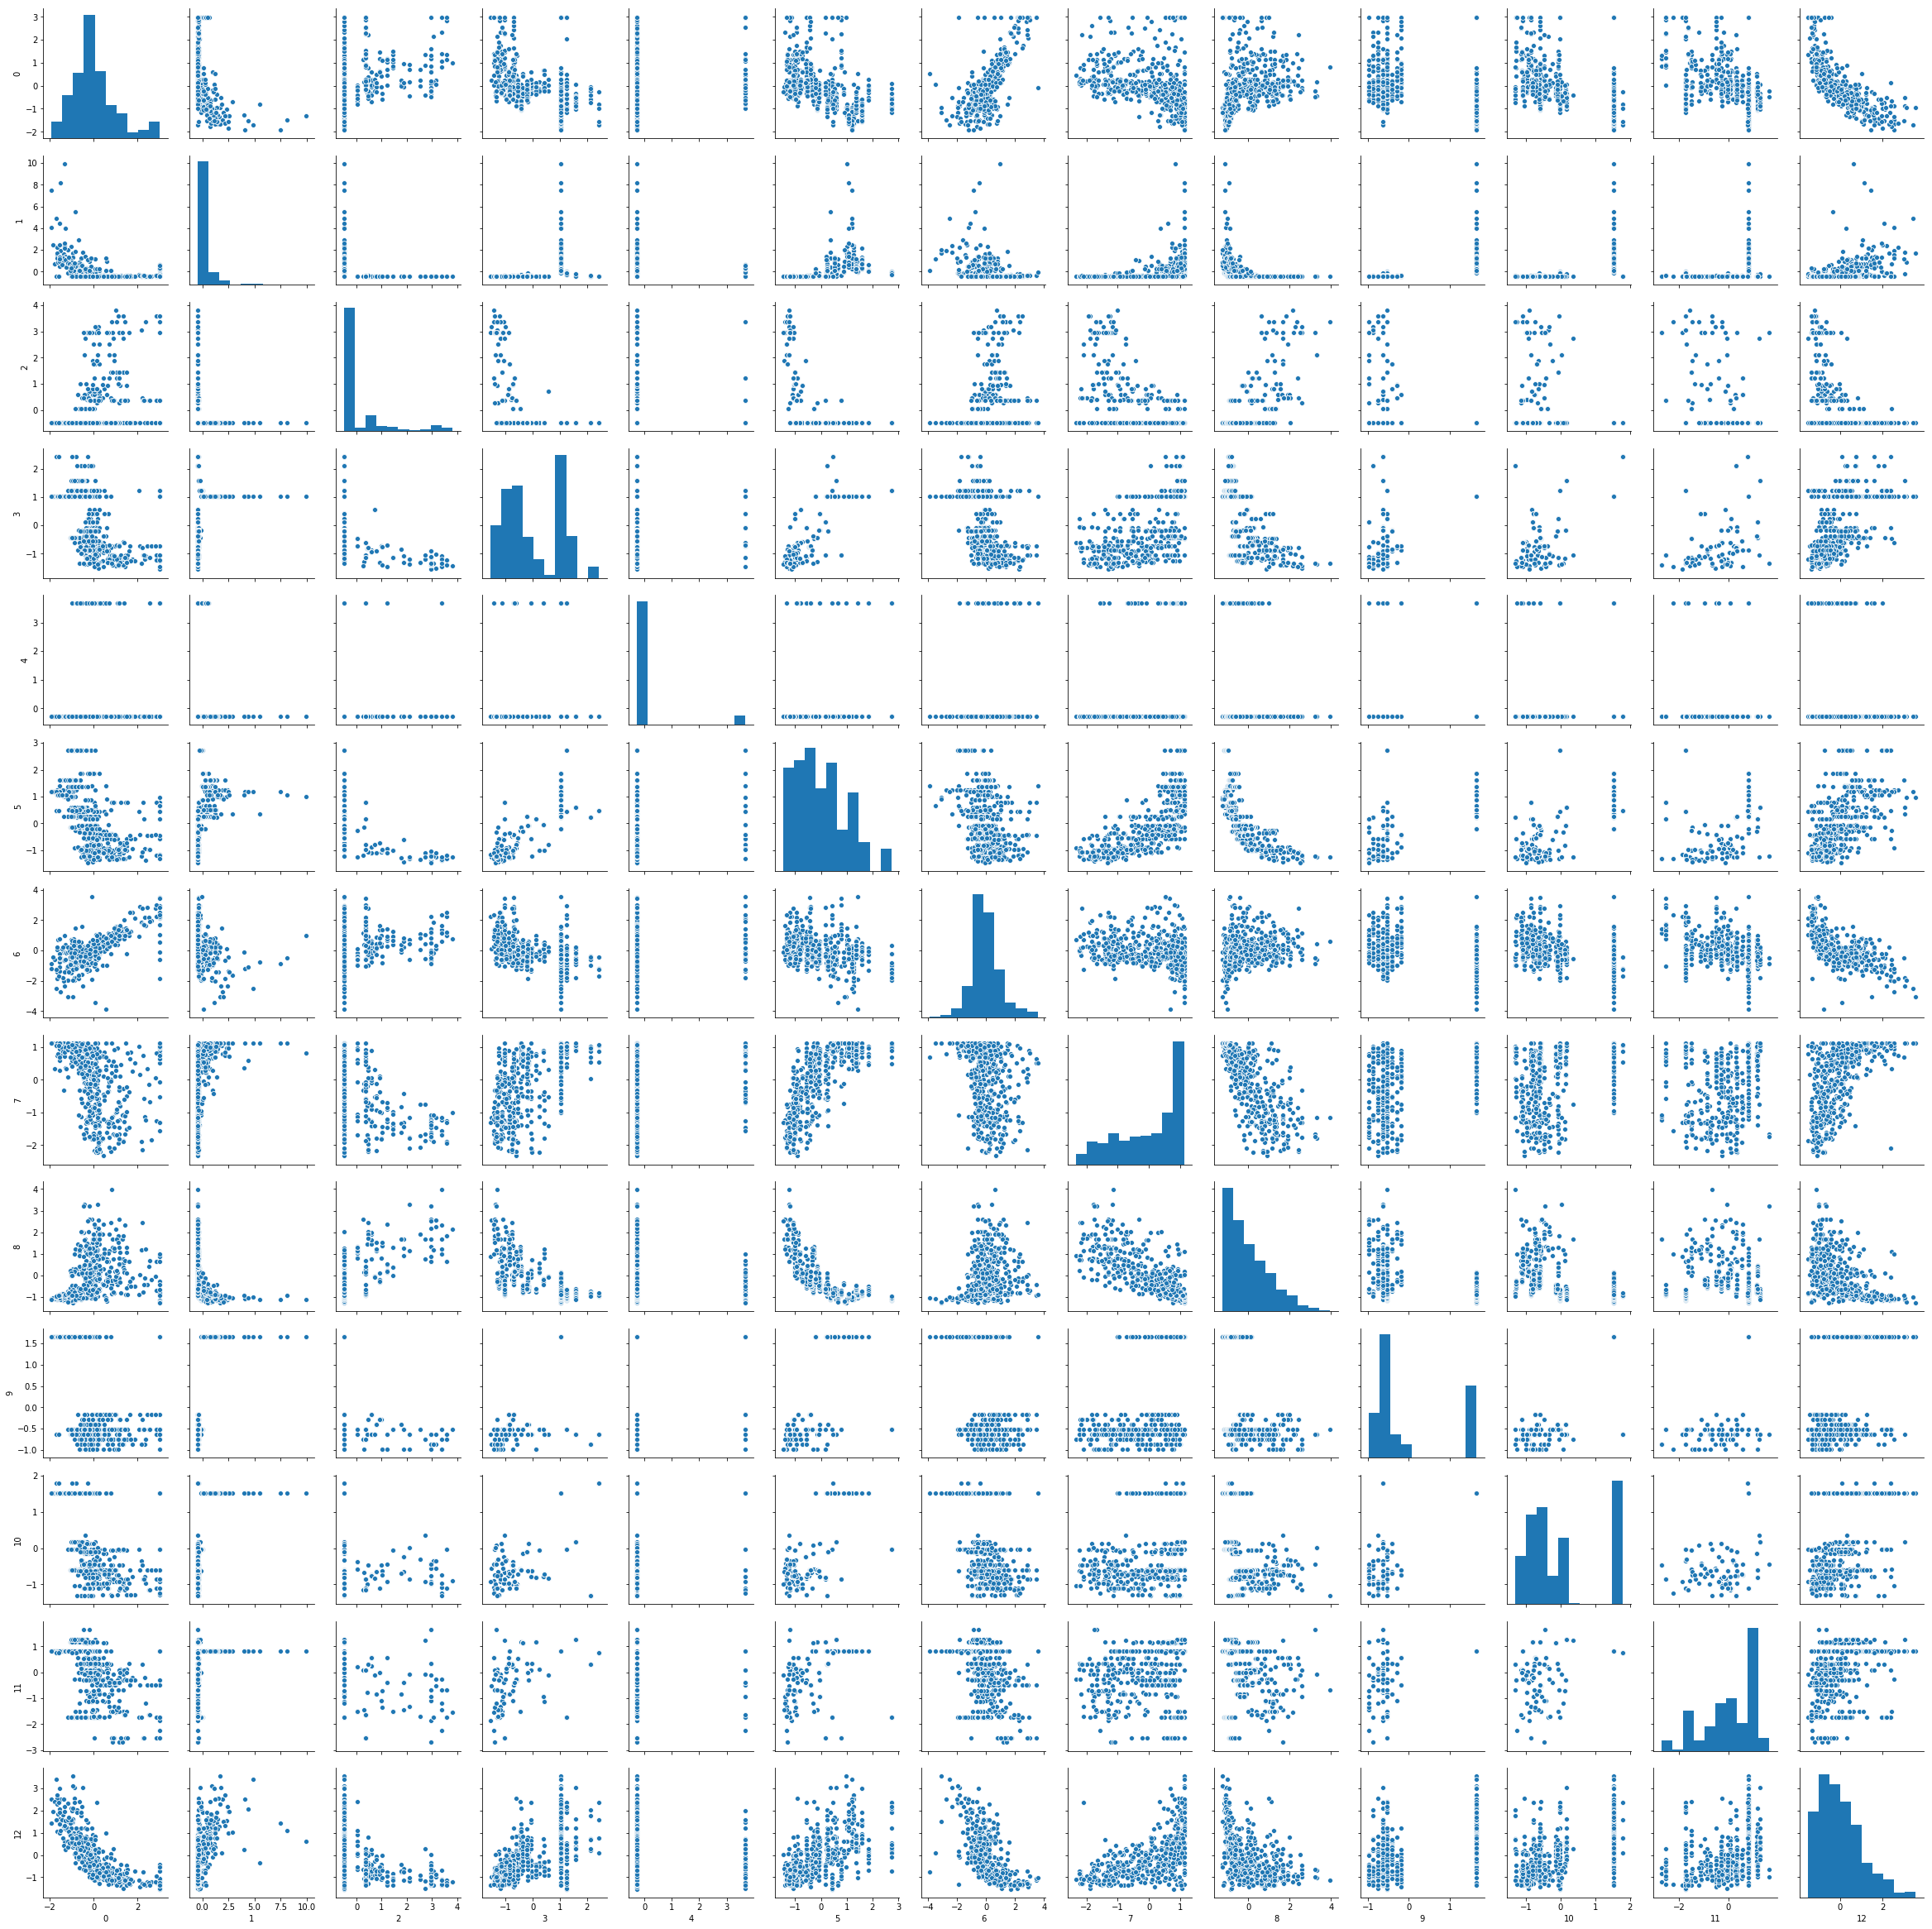

In [44]:
boston_norm = pd.DataFrame(data=model_data)
sns.pairplot(boston_norm, kind="scatter")
plt.show()

# this plots shows much more normalized data

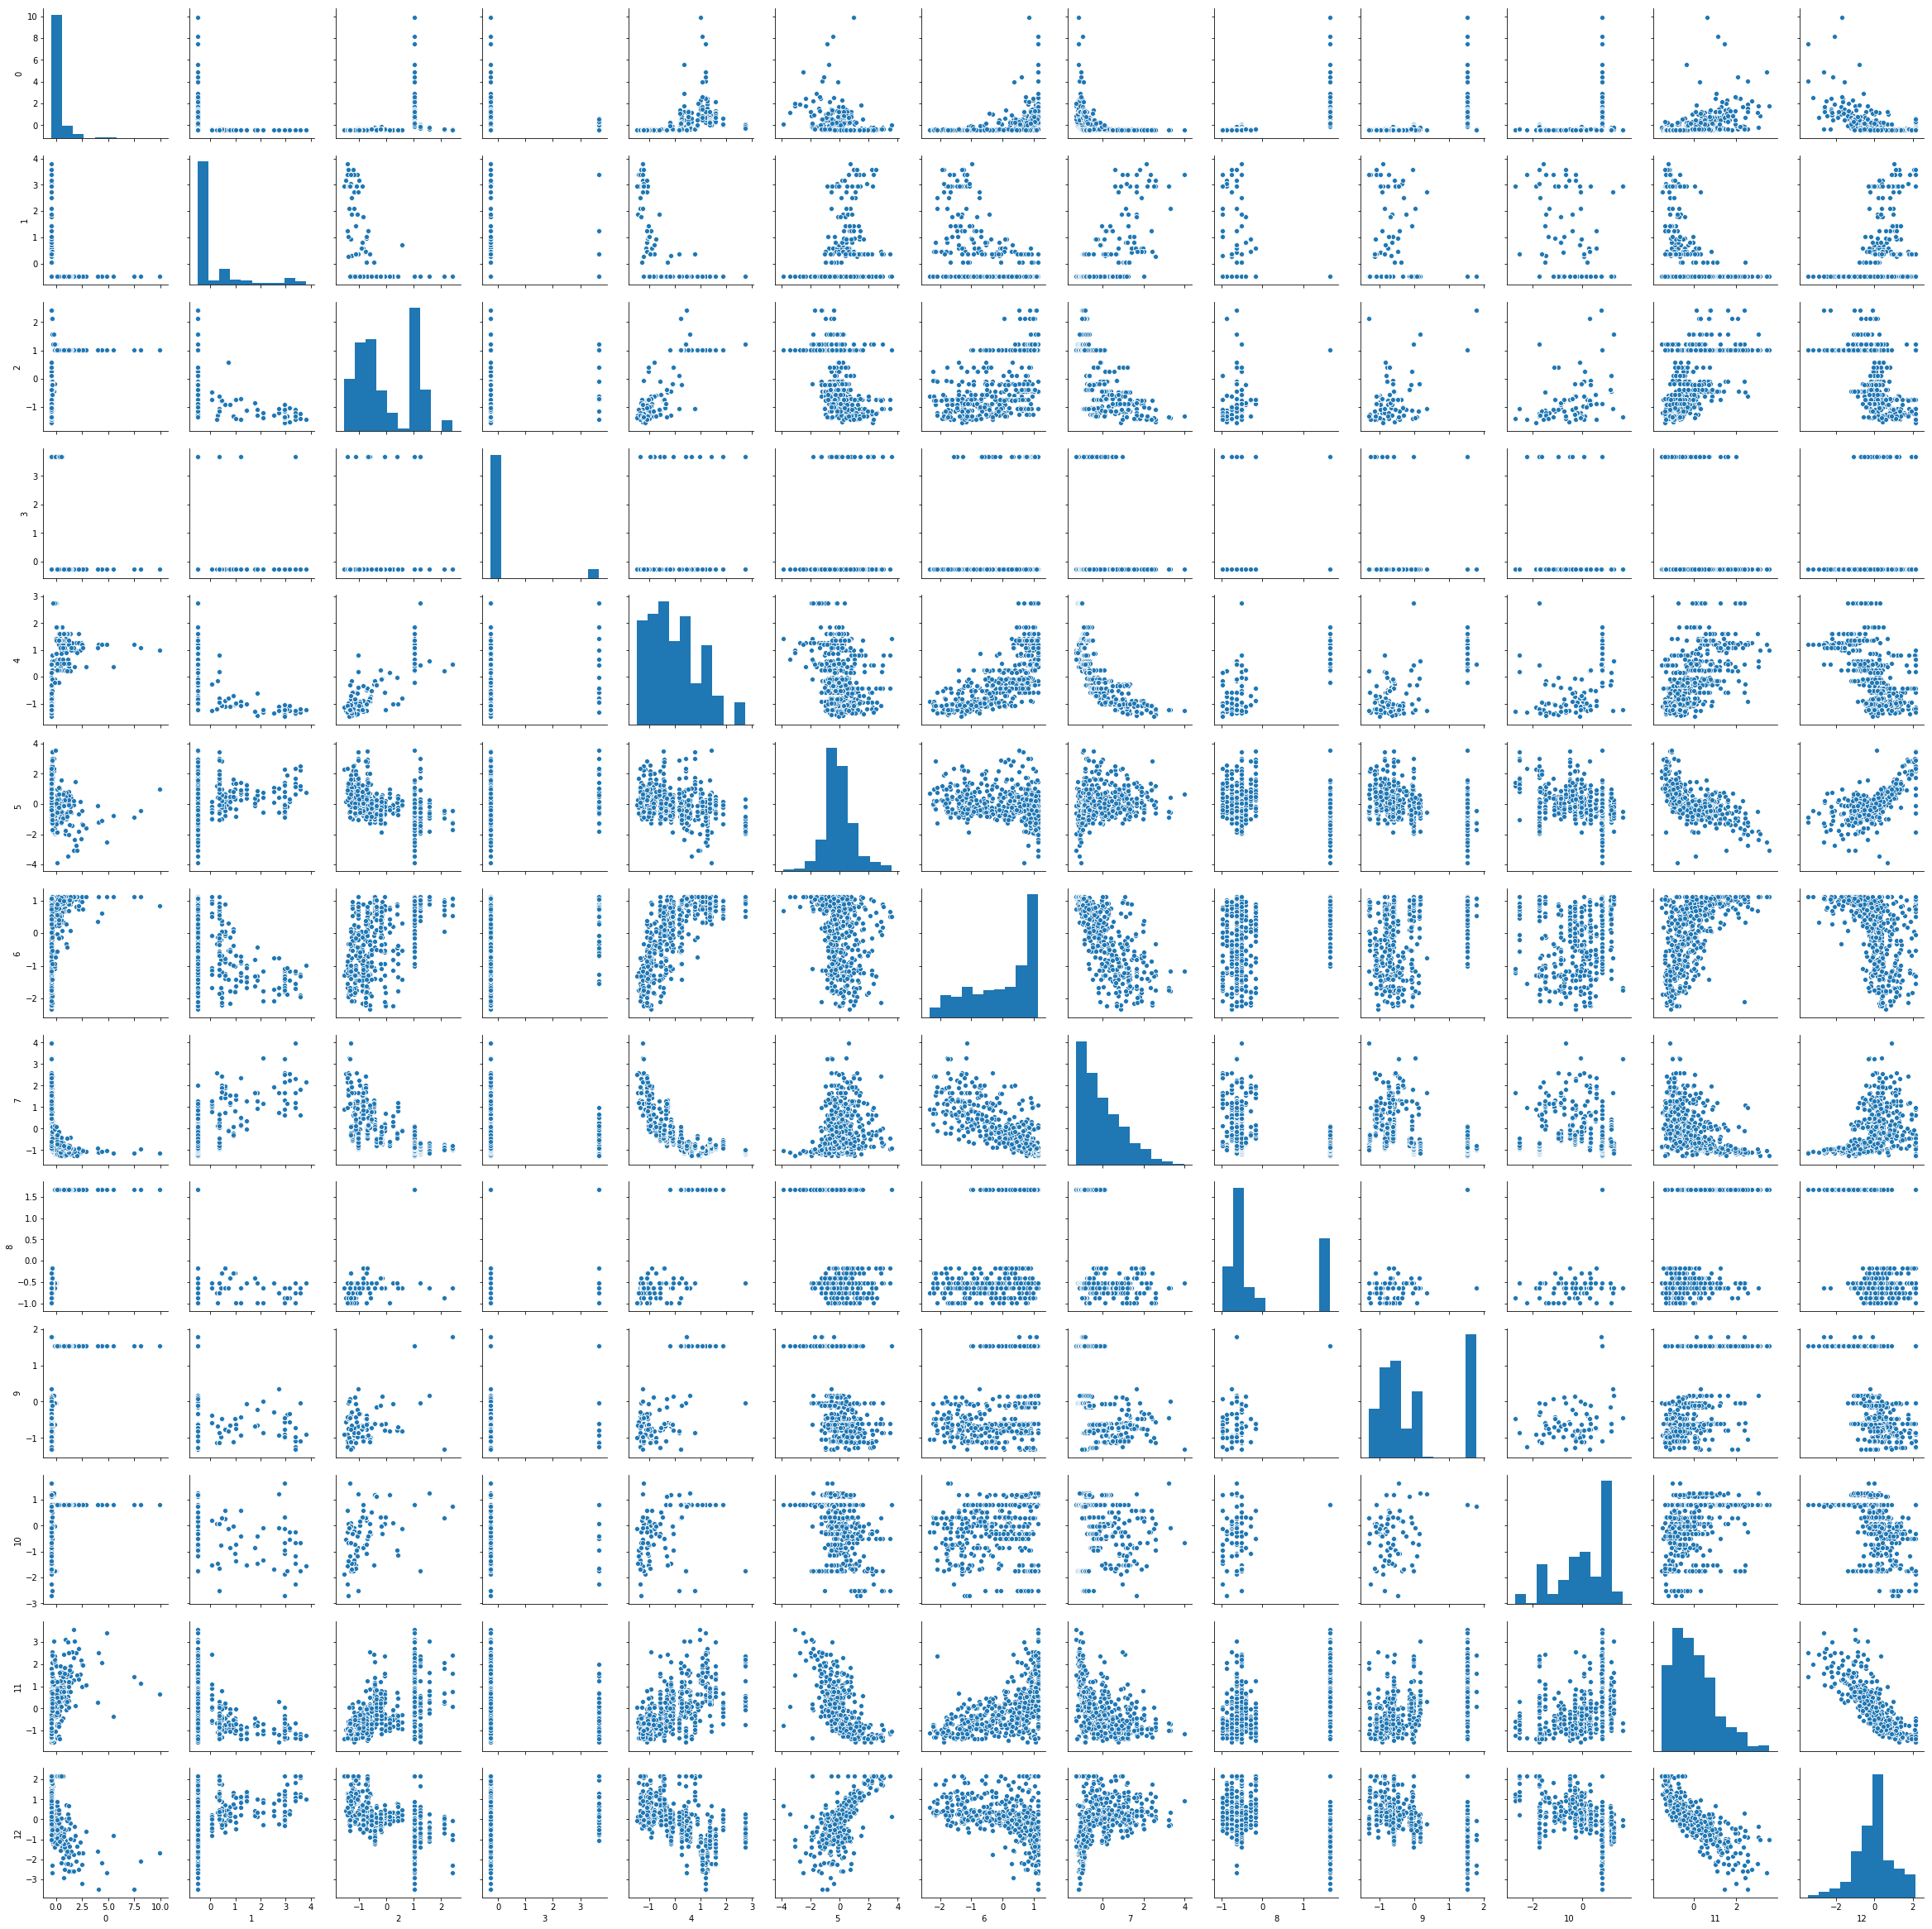

In [41]:
boston_log = pd.DataFrame(data=model_data_log)
sns.pairplot(boston_log, kind="scatter")
plt.show()

Text(0.5, 1.0, 'Median Home Value versus Crime Rate')

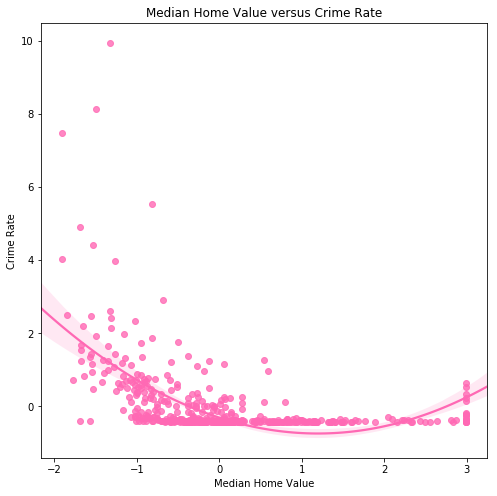

In [83]:
# 0 v 1: median value v crime rate
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[0], y=boston_norm[1], order=2, color="hotpink")
plt.xlabel("Median Home Value")
plt.ylabel("Crime Rate")
plt.title("Median Home Value versus Crime Rate")

# not a linear relationship

Text(0.5, 1.0, 'Median Home Value versus Crime Rate')

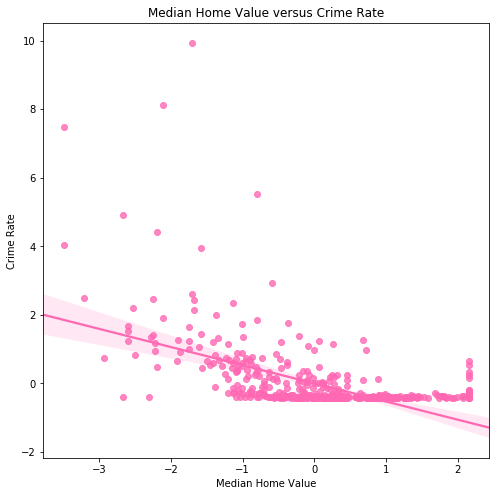

In [46]:
# 0 v 1: median value v crime rate
plt.figure(figsize=(8,8))
sns.regplot(x=boston_log[12], y=boston_log[0], color="hotpink")
plt.xlabel("Median Home Value")
plt.ylabel("Crime Rate")
plt.title("Median Home Value versus Crime Rate")

# it does not appear that the log transformation of the dependent variable has made much of a difference

Text(0.5, 1.0, 'Density Plot of Median Home Value versus On Charles River')

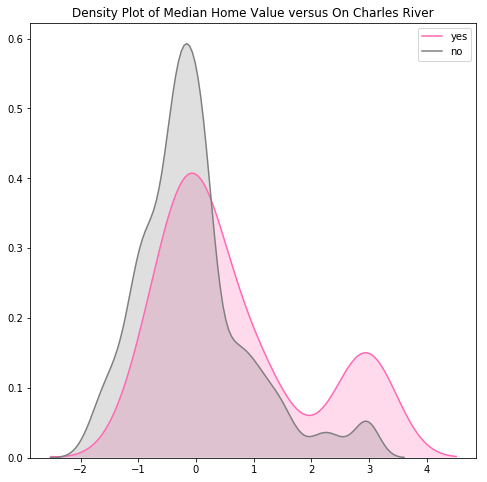

In [85]:
### 0 v 4: median value v on charles rivers
plt.figure(figsize=(8,8))
sns.kdeplot(boston_norm[boston_norm[4] >= 1][0], shade=True, color="hotpink")
sns.kdeplot(boston_norm[boston_norm[4] <= 1][0], shade=True, color="grey")
plt.legend(['yes','no'])
plt.title("Density Plot of Median Home Value versus On Charles River")

# being on the Charles River does appear to impact home value

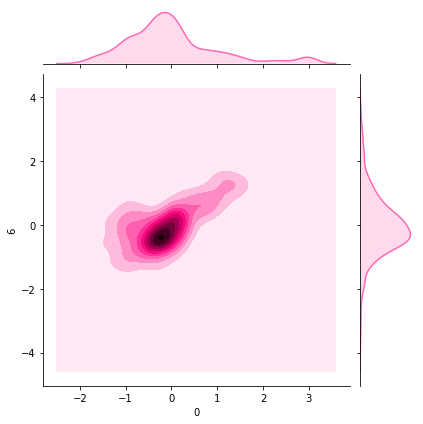

In [86]:
# 0 v 6: median value v rooms
sns.jointplot(x=boston_norm[0], y=boston_norm[6], kind='kde', color="hotpink")

# there is a linear relationship between median home value and the number of bedrooms

Text(0.5, 1.0, 'Median Home Value versus Socio-Economic Status')

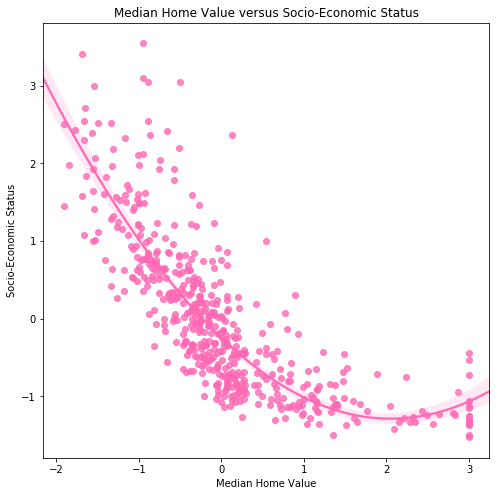

In [87]:
# 0 v 12: median value v percent of lower socio-economic status
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[0], y=boston_norm[12], order=2, color="hotpink")
plt.xlabel("Median Home Value")
plt.ylabel("Socio-Economic Status")
plt.title("Median Home Value versus Socio-Economic Status")

# not a linear relationship
# it is not unsurprising that lower socio-economic status is negatively correlated with home values

Text(0.5, 1.0, 'Median Home Value versus Socio-Economic Status')

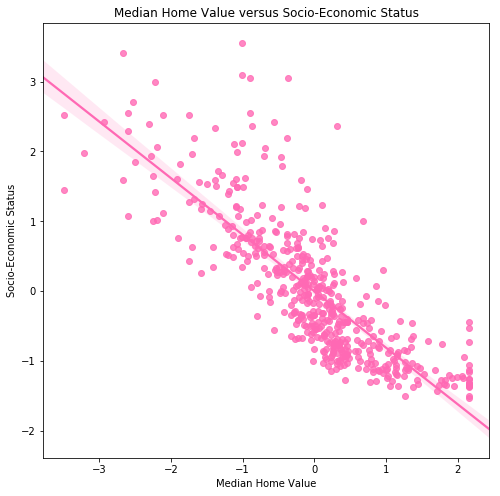

In [47]:
# 0 v 12: median value v percent of lower socio-economic status
plt.figure(figsize=(8,8))
sns.regplot(x=boston_log[12], y=boston_log[11], color="hotpink")
plt.xlabel("Median Home Value")
plt.ylabel("Socio-Economic Status")
plt.title("Median Home Value versus Socio-Economic Status")

# with the log transformation of median home value, this relationship is much more linear

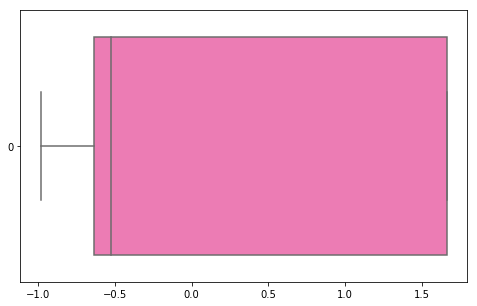

In [101]:
# outliers in 9: Access to Radial Highways
plt.figure(figsize=(8,5))
sns.boxplot(data=boston_norm[9], orient="h", color="hotpink")

# it appeared there were more outliers in the pairs plot above

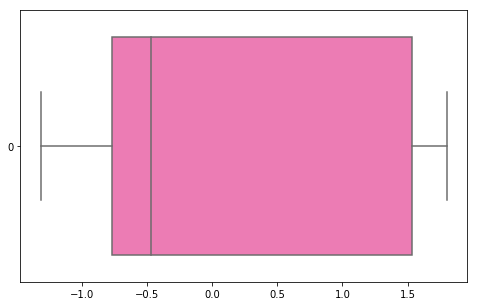

In [102]:
# outliers in 10: Tax Rate
plt.figure(figsize=(8,5))
sns.boxplot(data=boston_norm[10], orient="h", color="hotpink")

# it appeared there were more outliers in the pairs plot above

Text(0.5, 1.0, 'Air Pollution versus Industrial')

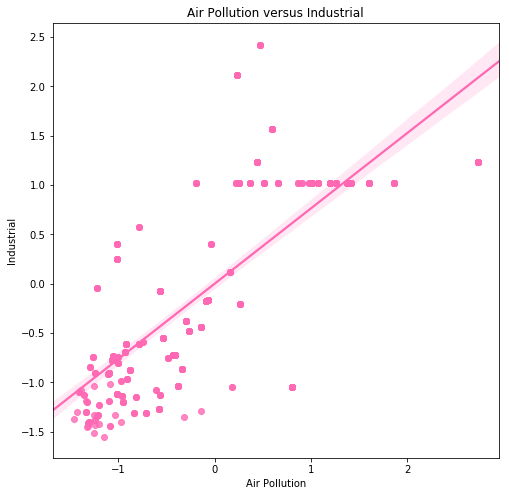

In [109]:
# 5 v 3: Air Pollution versus Industrial
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[5], y=boston_norm[3], color="hotpink")
plt.xlabel("Air Pollution")
plt.ylabel("Industrial")
plt.title("Air Pollution versus Industrial")

# there is a clear, positive relationship between air pollution and industrials

Text(0.5, 1.0, 'Air Pollution versus Distance to Employment Centers')

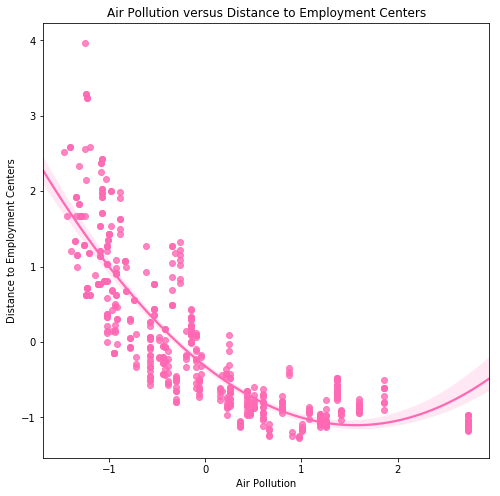

In [106]:
# 5 v 8: Air Pollution versus Distance to Employment Centers
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[5], y=boston_norm[8], order=2, color="hotpink")
plt.xlabel("Air Pollution")
plt.ylabel("Distance to Employment Centers")
plt.title("Air Pollution versus Distance to Employment Centers")

# in areas where the distance to employment centers are low, there is higher air pollution
# this could be due to areas with employment centers being relatively poor

Text(0.5, 1.0, 'Age of Homes versus Distance to Employment Centers')

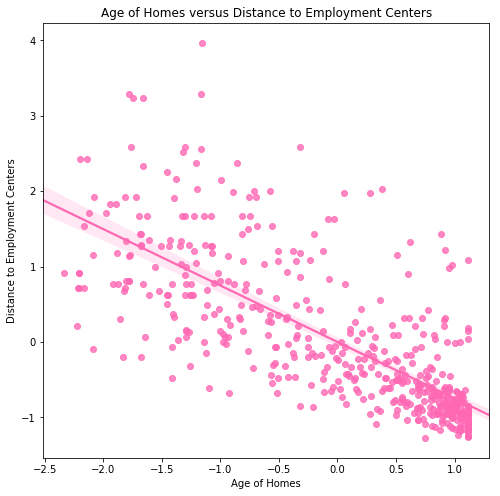

In [111]:
# 7 v 8: Age of Homes versus Distance to Employment Centers
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[7], y=boston_norm[8], color="hotpink")
plt.xlabel("Age of Homes")
plt.ylabel("Distance to Employment Centers")
plt.title("Age of Homes versus Distance to Employment Centers")

# there is a negative relationship between age of homes and distance to employment centers
# meaning, newer homes are associated with less of a need for employment centers

Text(0.5, 1.0, 'Number of Bedrooms versus Socio-Economic Status')

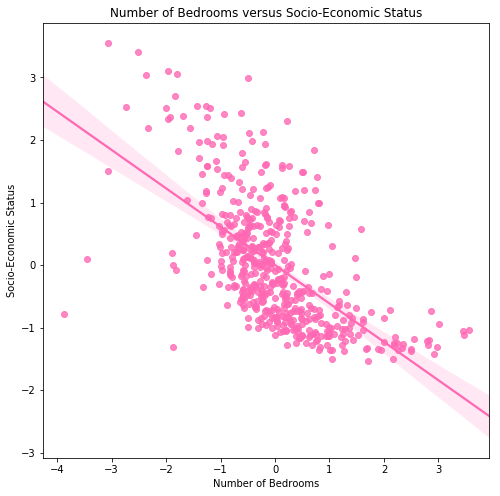

In [117]:
# 6 v 12: Number of Bedrooms versus Socio-Economic Status
plt.figure(figsize=(8,8))
sns.regplot(x=boston_norm[6], y=boston_norm[12], color="hotpink")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Socio-Economic Status")
plt.title("Number of Bedrooms versus Socio-Economic Status")

In [48]:
boston_norm.head(10)

0         1         2         3         4         5         6   \
0  0.160376 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672   
1 -0.101258 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274   
2  1.326830 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714   
3  1.185112 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303   
4  1.490352 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577   
5  0.672744 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096   
6  0.040460 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411   
7 -0.046751 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466   
8 -0.657232 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206   
9 -0.395597 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808   

         7         8         9         10        11        12  
0 -0.120013  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  
1  0.367166  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  
2 -0.265812  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  
3 -0.809889  1.077737 -0.752922 -1.106115  0.113032 -1.361517  
4 -0.511180  1.077737 -0.752922 -1.106115  0.113032 -1.026501  
5 -0.351157  1.077737 -0.752922 -1.106115  0.113032 -1.043322  
6 -0.070229  0.839244 -0.523001 -0.577519 -1.505237 -0.031268  
7  0.978808  1.024638 -0.523001 -0.577519 -1.505237  0.910700  
8  1.117494  1.087196 -0.523001 -0.577519 -1.505237  2.421774  
9  0.616090  1.329635 -0.523001 -0.577519 -1.505237  0.623344

In [49]:
boston_log.head(10)

0         1         2         3         4         5         6   \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

         7         8         9         10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  0.351817  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  0.093498  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  1.255744  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  1.162127  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  1.359501  
5  1.077737 -0.752922 -1.106115  0.113032 -1.043322  0.790297  
6  0.839244 -0.523001 -0.577519 -1.505237 -0.031268  0.236788  
7  1.024638 -0.523001 -0.577519 -1.505237  0.910700  0.149605  
8  1.087196 -0.523001 -0.577519 -1.505237  2.421774 -0.566840  
9  1.329635 -0.523001 -0.577519 -1.505237  0.623344 -0.233888

## Modeling

In [122]:
# split into training and test sets
# assignment states "Use all explanatory variables (with the exception of neighborhood) and all 506 census tract 
# observations from the Boston Housing Study." so this is just for practice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data[:,1:], model_data[:,0], test_size=0.3, random_state=42)

In [123]:
print(X_train[:1])
print(X_test[:1])
print(y_train[:1])
print(y_test[:1])

[[-0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384  0.20709638
  -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321  -1.04332233]]
[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914 -0.50645674]]
[0.67274395]
[0.11677039]


In [124]:
X = model_data[:,1:]
y = model_data[:,0].reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [125]:
print(X_train[:1])
print(X_test[:1])
print(y_train[:1])
print(y_test[:1])
print(X[:1])
print(y[:1])

[[-0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384  0.20709638
  -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321  -1.04332233]]
[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914 -0.50645674]]
[[0.67274395]]
[[0.11677039]]
[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038 -1.0755623 ]]
[[0.16037616]]


In [127]:
# ridge regression
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [128]:
print(ridge_reg.coef_)

[[-0.12870396  0.09459119  0.02638405  0.09564695 -0.19383838  0.29820839
  -0.028308   -0.32126193  0.19948543 -0.17136225 -0.19892834 -0.45017317]]


In [129]:
# lasso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
print(lasso_reg.coef_)

[-0.00663062  0.         -0.          0.03486402 -0.          0.29275986
 -0.         -0.         -0.         -0.         -0.13479239 -0.42436307]


In [131]:
# elastic net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
print(elastic_net.coef_)

[-0.05106892  0.         -0.          0.07105309 -0.          0.3097539
 -0.         -0.0220948  -0.         -0.00832383 -0.15514444 -0.41985821]


In [133]:
# calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(boston_norm.values, i) for i in range(boston_norm.shape[1])]
vif["Features"] = boston_norm.columns

In [134]:
vif.round(1).sort_values(by=['VIF Factor'])

# based on the VIF values of the data, it may be worth while dropping feature 9 and 10

VIF Factor  Features
4          1.1         4
1          1.8         1
11         2.0        11
6          2.2         6
2          2.4         2
7          3.1         7
12         3.6        12
0          3.8         0
3          4.0         3
8          4.4         8
5          4.6         5
9          7.7         9
10         9.2        10

In [143]:
# import additional packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
# random forest
random_forest = RandomForestRegressor(n_estimators=500, max_features="log2", n_jobs=-1)
random_forest.fit(X_train, y_train)

# received error: "max_features must be in (0, n_features]"
# https://stackoverflow.com/questions/42072721/valueerror-max-features-must-be-in-0-n-features-in-scikit-when-using-rand

C:\Users\brand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [145]:
print(random_forest.feature_importances_)

[0.07429093 0.00771667 0.06081896 0.01136651 0.07285859 0.28298597
 0.0346479  0.067371   0.01078557 0.04207765 0.06521483 0.26986541]


In [146]:
# gradient boosting
gradient_boost = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gradient_boost.fit(X_train, y_train)

C:\Users\brand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
print(gradient_boost.feature_importances_)

[1.93291223e-02 9.91670331e-05 1.47238512e-04 7.10531281e-04
 4.69094863e-02 3.99894455e-01 7.94433776e-03 6.42455597e-02
 1.74792288e-03 1.22891892e-02 2.70069287e-02 4.19676061e-01]


## Evaluation

In [153]:
# cross-validation design, using root mean-squared error (RMSE) as an index of prediction error
from sklearn.model_selection import cross_val_score

rr_scores = cross_val_score(ridge_reg, X, y, scoring="neg_mean_squared_error", cv=10)
rr_rmse_scores = np.sqrt(-rr_scores)

lr_scores = cross_val_score(lasso_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

en_scores = cross_val_score(elastic_net, X, y, scoring="neg_mean_squared_error", cv=10)
en_rmse_scores = np.sqrt(-en_scores)

rf_scores = cross_val_score(random_forest, X, model_data[:,0], scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

gb_scores = cross_val_score(gradient_boost, X, model_data[:,0], scoring="neg_mean_squared_error", cv=10)
gb_rmse_scores = np.sqrt(-gb_scores)

In [154]:
print(rr_scores)
print(rr_rmse_scores)
print(lr_scores)
print(lr_rmse_scores)
print(en_scores)
print(en_rmse_scores)
print(rf_scores)
print(rf_rmse_scores)
print(gb_scores)
print(gb_rmse_scores)

[-0.09409217 -0.17049949 -0.1900943  -0.42666565 -0.3848948  -0.24577431
 -0.1166103  -1.79469832 -0.44787998 -0.10871389]
[0.30674447 0.41291584 0.43599805 0.65319649 0.62039891 0.4957563
 0.3414825  1.33966351 0.66923836 0.3297179 ]
[-0.09231587 -0.11113138 -0.0971102  -0.66743621 -0.38416651 -0.51289132
 -0.16769218 -1.70099987 -0.55948005 -0.09376563]
[0.30383527 0.33336373 0.31162509 0.81696769 0.61981167 0.71616431
 0.40950236 1.30422386 0.74798399 0.30621174]
[-0.09028342 -0.11334604 -0.10358151 -0.60603994 -0.33755584 -0.4049429
 -0.15889204 -1.74918291 -0.50116992 -0.09033866]
[0.300472   0.33666904 0.32184081 0.77848567 0.58099556 0.63635124
 0.39861264 1.32256679 0.70793356 0.30056391]
[-0.12838155 -0.06327498 -0.03665513 -0.3593804  -0.16234448 -0.23811613
 -0.12155231 -0.93845745 -0.18968952 -0.11999351]
[0.35830371 0.25154519 0.19145529 0.59948344 0.40291994 0.48797144
 0.34864353 0.96874013 0.4355336  0.3464008 ]
[-0.07997882 -0.07348604 -0.11470379 -0.17702437 -0.170896

In [163]:
print(np.mean(rr_rmse_scores))
print(np.mean(lr_rmse_scores))
print(np.mean(en_rmse_scores))
print(np.mean(rf_rmse_scores))
print(np.mean(gb_rmse_scores))

0.5605112331781369
0.5869689716785458
0.5684491220215488
0.43909970766791073
0.41970075146942865


In [155]:
rr = ridge_reg.score(X,y)
rr

0.734832272362584

In [156]:
lr = lasso_reg.score(X,y)
lr

0.6729282109735377

In [157]:
en = elastic_net.score(X,y)
en

0.6907786110903651

In [158]:
rr = random_forest.score(X,y)
rr

0.9488316890140528

In [159]:
gb = gradient_boost.score(X,y)
gb

0.9276371512250164

## Recommendation

Advise a real estate brokerage firm in its attempt to employ machine learning methods to assess the market value of residential real estate. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management. Of the modeling methods examined in your study, which would you recommend to management, and why? How well does the model perform? What are the most important predictors?

Out of the 5 models created, the random forest model accounts for 95% of the variance in the data, with the gradient boosted model coming in 2nd with 93%, followed by the ridge regression, elastic net, and lasso regression with 73%, 69%, and 67% respectively. Using RMSE scores as a measure of model accuracy, though, puts the gradient boosted model at the top, followed by random forest, lasso regression, elastic net, and ridge regression. Based on these scores I would recommend the gradient boosted model or the random forest model. 

The important features are listed below for each of those models. It is clear they both favor element 5 and 11, which corresponds to the average number of bedrooms and socio-economic status. The gradient boosted model is concerned with fewer features overall, though.

Given this information, it would be interesting to review a linear model using just these two variables. Additionally, the random forest and gradient boosted models could be further tuned with more estimators and hyper parameter tuning.

<BarContainer object of 12 artists>

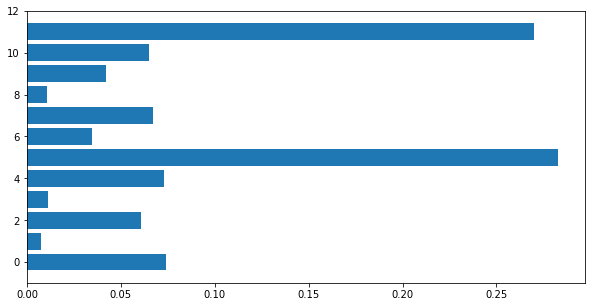

In [178]:
plt.figure(figsize=(10,5))
plt.barh(np.arange(12), random_forest.feature_importances_)

<BarContainer object of 12 artists>

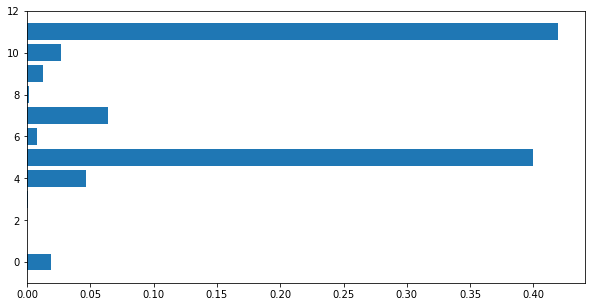

In [174]:
plt.figure(figsize=(10,5))
plt.barh(np.arange(12), gradient_boost.feature_importances_)